# F-MNIST Classification
## Jacob Gomez Rubio and Brandon Ferencik

In [2]:
import numpy as np
import matplotlib.pyplot as plt   # plot results
from sklearn.model_selection import KFold   # CV
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.neighbors import KNeighborsClassifier   # kNN Model
from sklearn.neural_network import MLPClassifier     # NN Model
# import timeit   # time computations
from tqdm import tqdm_notebook # loading bar to show progress

In [3]:
# load images from same directory
X_train = np.load("fmnist-train-imgs.npz")['X']
X_test = np.load("fmnist-test-imgs.npz")['X']
Y_train = np.load("fmnist-train-labels.npz")['y']

In [8]:
print('training set size: {}'.format(X_train.shape))
print('test set size: {}'.format(X_test.shape))
print('label size (should be same as training set size): {}'.format(Y_train.shape))

training set size: (42000, 784)
test set size: (28000, 784)
label size (should be same as training set size): (42000,)


In [7]:
def getAcc(y_pred,y_test): 
    return np.mean(y_pred==y_test * 1)

In [4]:
kfold = KFold(n_splits=4)

# kNN Approach

In [6]:
kNN = KNeighborsClassifier(n_neighbors=9)
x = np.linspace(0.01, 1, 100) # [0.01, 1] closed interval
time = np.zeros(len(x))
acc_average = np.zeros(len(x)) 
acc_fold = np.zeros(kfold.n_splits)

time: 1.91 ms


### Testing results kNN with PCA reduction
Since while knn is an accurate way to predict an input, it is more computationally intensive than other model approaches. Thus, we will compromise between accuracy and dimensionality by using PCA.

In [2]:
# Loop that increases dimension % and makes kNN predictions based 
    # on dimension size.
# Outputs the average accuracy achieved.
# across all folds and elapsed time to make predictions

for i in tqdm_notebook(range(len(x))): 
    # create test/train copies to test with
    X_trainCopy = X_train
    X_testCopy = X_test
    pca = PCA(n_components=x[i]) # x is 0.01, 0.02, ... , 1

    # train/test copies now have n% dimensionality with PCA
    X_trainCopy = pca.fit_transform(X_trainCopy)
    X_testCopy = pca.fit_transform(X_testCopy)
    
    # fit knn model to newly transformed variables (or full dataset if x[i]=1)
    kNNmodel.fit(X_trainCopy,Y_train)
    # timer for gauging performance time
    start = timeit.default_timer()
    
    j=0
    for train_index, test_index in kfold.split(X_trainCopy):
        x_train, x_test = X_trainCopy[train_index], X_trainCopy[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
        
        y_pred = kNNmodel.predict(x_test) # compute y_pred values
        acc_fold[j] = getAcc(y_pred,y_test) # where (y_pred == y_test)
        print("K-Fold acc (%d%% dimensionality): %.5f" % (x[i]*100, acc_fold[j]))
        j+=1
        
    acc_average[i] = np.mean(acc_fold)
    end = timeit.default_timer()
    time[i] = end.real - start.real
    
    print("Avg acc (%d%% dimensionality): %.5f" %(x[i]*100, acc_average[i]))
    print("Elapsed Time (%d%% dimensionality): %.3f sec\n" %(x[i]*100, time[i]))

NameError: name 'x' is not defined

## Plotting results:

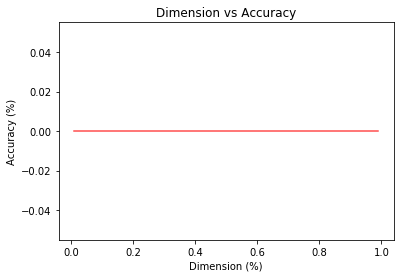

time: 258 ms


In [7]:
plt.plot(x[:-1], acc_average[:-1], 'r-', alpha=0.7)
plt.title("Dimension vs Accuracy")
plt.xlabel("Dimension (%)")
plt.ylabel("Accuracy (%)")
plt.show()

In [115]:
# improvements in output accuracy from difference in dimensionality
print("highest accuracy (%.3f) at index" % \
      acc_average.max(), acc_average.argmax())

highest accuracy (0.886) at index 92


### Conclusion
After testing different amounts of the `n_components` parameter with the kNN algorithm, we are able to get, at best, **89% accuracy with 92% of our dataset using PCA.**

We can go further, though. kNN accuracy only differs by ~3-5% when reducing dimensionality from 92% to 70%. Thus, we can still achieve **accuracy of 85% with only 70% of the dataset** using Principal Component Analysis.

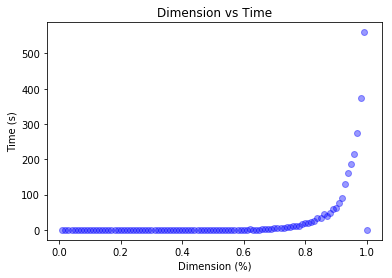

In [116]:
plt.plot(x, time, 'bo', alpha=0.4)
plt.title("Dimension vs Time")
plt.xlabel("Dimension (%)")
plt.ylabel("Time (s)")
plt.show()

In [45]:
time[92], time[70]

(0.0, 0.0)

time: 6.25 ms


# Feed-Forward Neural Network

In [ ]:
#NN model, learning_rate set to adaptive in order to adjust eta in the gradient descent process
X_trainCopy = X_train
X_testCopy = X_test
# default hidden_layers = (100,)
model = MLPClassifier(random_state=1,verbose=True,\
                      solver='adam',learning_rate='adaptive',\
                      learning_rate_init=1e-3)
acc_fold = np.zeros(kfold.n_splits) # using 4 splits as above

### Predictions to be submitted

In [6]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

Iteration 1, loss = 4.34788806
Iteration 2, loss = 1.37718184
Iteration 3, loss = 0.94525043
Iteration 4, loss = 0.74090575
Iteration 5, loss = 0.65289377
Iteration 6, loss = 0.59467840
Iteration 7, loss = 0.54424723
Iteration 8, loss = 0.50845205
Iteration 9, loss = 0.48603448
Iteration 10, loss = 0.47131538
Iteration 11, loss = 0.44876464
Iteration 12, loss = 0.43568092
Iteration 13, loss = 0.43445002
Iteration 14, loss = 0.42007562
Iteration 15, loss = 0.41420379
Iteration 16, loss = 0.40771751
Iteration 17, loss = 0.40536404
Iteration 18, loss = 0.39334342
Iteration 19, loss = 0.40861090
Iteration 20, loss = 0.40736722
Iteration 21, loss = 0.39561334
Iteration 22, loss = 0.39668018
Iteration 23, loss = 0.39123701
Iteration 24, loss = 0.38738328
Iteration 25, loss = 0.38636492
Iteration 26, loss = 0.38107564
Iteration 27, loss = 0.38344481
Iteration 28, loss = 0.37148474
Iteration 29, loss = 0.36804784
Iteration 30, loss = 0.37646687
Iteration 31, loss = 0.36511973
Iteration 32, los

### Cross Validation using k = 4 folds

In [ ]:
#Trains NN model across all folds and asseses acccuracy of the predictions
#Outputs the average accuracy achieved
i = 0
for train_index, test_index in kfold.split(X_train):
    print(train_index)
    x_train, x_test = X_train[train_index], X_train[test_index]
    y_train, y_test = Y_train[train_index], Y_train[test_index]
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    acc_fold[i] = getAcc(y_pred, y_test)
    print("Accuracy on fold %d: %.5f \n" % (i+1, acc_fold[i]))
    i= i+1

[10500 10501 10502 ... 41997 41998 41999]
Iteration 1, loss = 5.16662332
Iteration 2, loss = 2.46236417
Iteration 3, loss = 1.18672562
Iteration 4, loss = 0.84778341
Iteration 5, loss = 0.72700102
Iteration 6, loss = 0.65465053
Iteration 7, loss = 0.60830419
Iteration 8, loss = 0.57413584
Iteration 9, loss = 0.54226855
Iteration 10, loss = 0.52221683
Iteration 11, loss = 0.49532480
Iteration 12, loss = 0.48578054
Iteration 13, loss = 0.46446356
Iteration 14, loss = 0.44257714
Iteration 15, loss = 0.43125571
Iteration 16, loss = 0.42217206
Iteration 17, loss = 0.42489891
Iteration 18, loss = 0.40358758
Iteration 19, loss = 0.39255587
Iteration 20, loss = 0.39202323
Iteration 21, loss = 0.38369078
Iteration 22, loss = 0.38393426
Iteration 23, loss = 0.38158798
Iteration 24, loss = 0.38265073
Iteration 25, loss = 0.36483993
Iteration 26, loss = 0.35943331
Iteration 27, loss = 0.35913712
Iteration 28, loss = 0.36545533
Iteration 29, loss = 0.36090405
Iteration 30, loss = 0.36989724
Iterati

/Users/jacob/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy on fold 1: 0.85610 

[    0     1     2 ... 41997 41998 41999]
Iteration 1, loss = 5.20301117
Iteration 2, loss = 2.25205316
Iteration 3, loss = 1.09968552
Iteration 4, loss = 0.84971929
Iteration 5, loss = 0.72589082
Iteration 6, loss = 0.65192348
Iteration 7, loss = 0.60956955
Iteration 8, loss = 0.56954028
Iteration 9, loss = 0.53653514
Iteration 10, loss = 0.50889464
Iteration 11, loss = 0.49339429
Iteration 12, loss = 0.47005188
Iteration 13, loss = 0.45524062
Iteration 14, loss = 0.43738171
Iteration 15, loss = 0.43071600
Iteration 16, loss = 0.41536261
Iteration 17, loss = 0.42410570
Iteration 18, loss = 0.39296365
Iteration 19, loss = 0.38576063
Iteration 20, loss = 0.38509394
Iteration 21, loss = 0.38736720
Iteration 22, loss = 0.38793805
Iteration 23, loss = 0.38184639
Iteration 24, loss = 0.38232236
Iteration 25, loss = 0.36977717
Iteration 26, loss = 0.36344558
Iteration 27, loss = 0.37379463
Iteration 28, loss = 0.35751448
Iteration 29, loss = 0.34689101
Iteration

### Training with a Neural Network is much faster.
The above neural network is able to classify with 85% accuracy using full dimensionality of the dataset. Computation time averages 6-7 minutes whereas kNN took an average of 60 minutes.

We can safely conclude that the model is trained ~10x faster by means of a neural network.

In [44]:
acc_average = np.mean(acc_fold)
print(acc_average)

0.8509047619047619
time: 978 µs


# Submission

In [9]:
solutions = np.zeros((28000, 2))
solutions[:,0] = np.arange(1,28001)
solutions[:,1] = y_pred
solutions = solutions.astype(int)
np.savetxt("solutions-jacobgomez-brandonferencik.csv", solutions, 
           fmt='%s', header = 'Id,Category', delimiter = ',', comments='')

time: 152 ms
